In [1]:
from scripts.figures_import_helper import *
%matplotlib inline

before/after industry comparisons, using national data

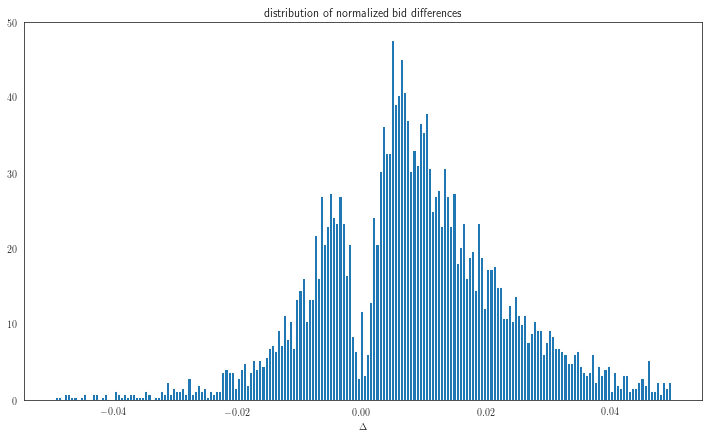

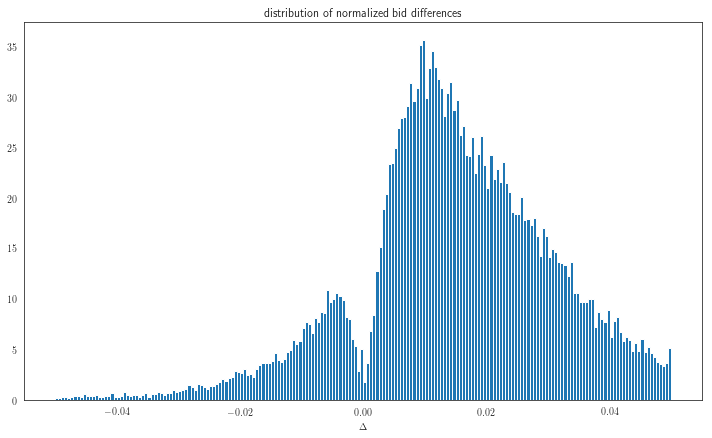

In [2]:
filename = 'tsuchiura_data.csv'
tsuchiura_data = auction_data.AuctionData(os.path.join(path_data, filename))
plot_delta(tsuchiura_data)

filename = 'municipal_pub_reserve_no_pricefloor.csv'
other_data = auction_data.AuctionData(os.path.join(path_data, filename))
plot_delta(other_data)

In [3]:
s1 = set(other_data.df_bids.pid)
s2 = set(tsuchiura_data.df_bids.pid)

assert len(s2.intersection(s1)) == 0

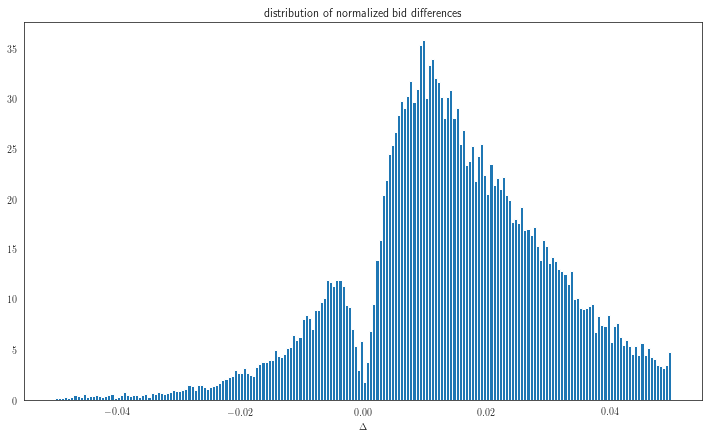

In [4]:
all_bids = pd.concat((other_data.df_bids, tsuchiura_data.df_bids), axis=0)
data = auction_data.AuctionData.from_clean_bids(all_bids)
plot_delta(data, filename='R2/city_auctions_delta')

In [5]:
list_devs = [[.0, .001], [-.025, .0], [-.025, .0, .001]]
list_solutions = []
for devs in list_devs:    
    solutions, ties = compute_solution_parallel(
        data, devs)
    list_solutions.append(1 - ties - solutions * (1-ties))

saving plot



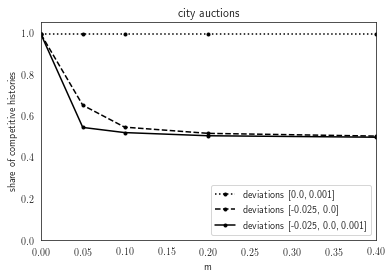

In [6]:
print('saving plot\n')
pretty_plot(
    'R2/city auctions',
    list_solutions,
    [r"deviations {}".format(devs) for devs in list_devs],
    xlabel='m',
    mark=np.array(['k.:', 'k.--', 'k.-']),
    xticks=r2_min_mkps
)

In [7]:
print('saving data\n')
save2frame(list_solutions,
           ['min_m={}'.format(m) for m in r2_min_mkps],
           'R2/city_auctions')

saving data

